In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from umap import UMAP
from sklearn.manifold import TSNE

In [175]:
u = np.load("./part1/UM/Setting_2_U_2.npy")
m = np.load("./part1/UM/Setting_5_M_2.npy")
m = np.transpose(m)
m.shape

(3952, 10)

In [169]:
users = pd.read_table("./part1/ml-1m/users.dat", sep="::", names=["UserID", "Gender", "Age", "Occupation", "Zip-code"], engine="python")
movies = pd.read_table("./part1/ml-1m/movies.dat", sep="::", names=["MovieID", "Title", "Genres"], engine="python", encoding = "ISO-8859-1")
occupation = users["Occupation"].to_numpy()
age = users["Age"].to_numpy()
gender = users["Gender"].to_list()
gender = [g == "F" for g in gender]
genres = movies["Genres"].to_list()
all_genres = np.unique(genres)
genres = [np.where(all_genres==g)[0].item() for g in genres]
# users
year = movies["Title"].apply(lambda x: int(x[-5:-1]))
movies

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


movies.dat中有部分电影没有包括进去，在矩阵m中需要删除这些行。

In [176]:
not_in_movies = list(set(range(3952)) - set(movies["MovieID"].apply(lambda x: x-1)))
m = np.delete(m, not_in_movies, axis=0)
m.shape

(3883, 10)

## Users

### PCA

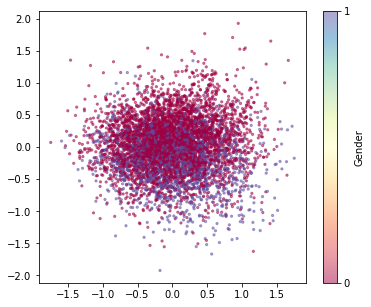

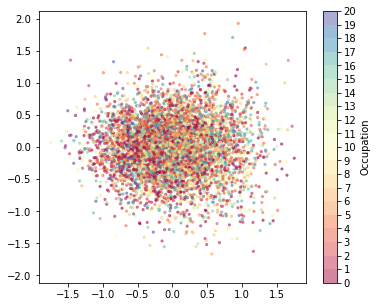

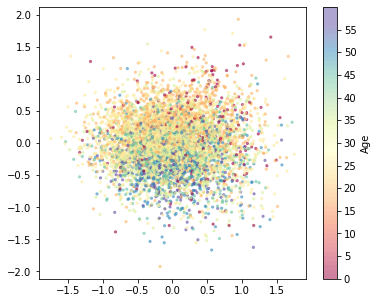

In [164]:
pca_model = PCA(n_components=2)
u_pca=pca_model.fit_transform(u)
plt.scatter(u_pca[:,0], u_pca[:,1], c=gender, alpha=0.5, cmap='Spectral',s=5)
plt.colorbar(label="Gender").set_ticks([0,1])
plt.savefig("./fig/pca_gender.png")
plt.show()
plt.scatter(u_pca[:,0], u_pca[:,1], c=occupation, alpha=0.5, cmap='Spectral',s=5)
plt.colorbar(boundaries=np.arange(21), label="Occupation").set_ticks(np.arange(21))
plt.savefig("./fig/pca_occ.png")
plt.show()
plt.scatter(u_pca[:,0], u_pca[:,1], c=age, alpha=0.5, cmap='Spectral',s=5)
plt.colorbar(boundaries=np.arange(61), label="Age").set_ticks(np.arange(0,60,5))
plt.savefig("./fig/pca_age.png")
plt.show()

### UMAP

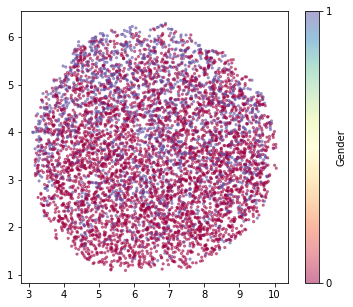

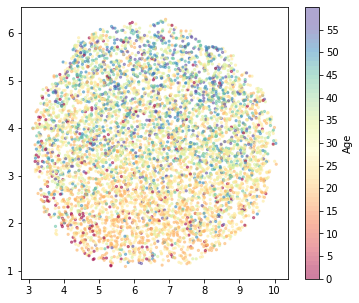

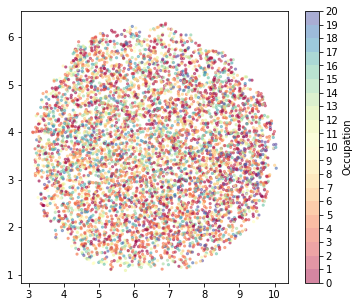

In [167]:
umap_model = UMAP(n_neighbors=10, n_components=2)
u_umap = umap_model.fit_transform(u)
plt.scatter(u_umap[:,0], u_umap[:,-1], c=gender, alpha=0.5, cmap='Spectral',s=5)
plt.colorbar(label="Gender").set_ticks([0,1])
plt.savefig("./fig/umap_gender.png")
plt.show()
plt.scatter(u_umap[:,0], u_umap[:,-1], c=age, alpha=0.5, cmap='Spectral',s=5)
plt.colorbar(boundaries=np.arange(61), label="Age").set_ticks(np.arange(0,60,5))
plt.savefig("./fig/umap_age.png")
plt.show()
plt.scatter(u_umap[:,0], u_umap[:,-1], c=occupation, alpha=0.5, cmap='Spectral',s=5)
plt.colorbar(boundaries=np.arange(21), label="Occupation").set_ticks(np.arange(21))
plt.savefig("./fig/umap_occ.png")
plt.show()

### TSNE

/Users/jiang/miniforge3/envs/data/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/jiang/miniforge3/envs/data/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


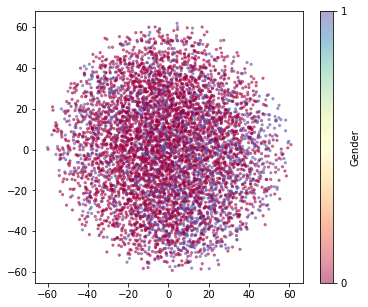

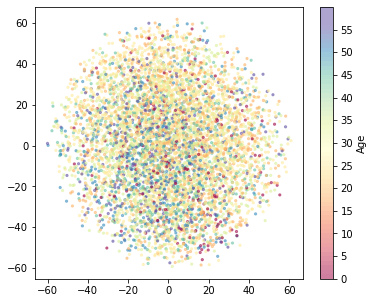

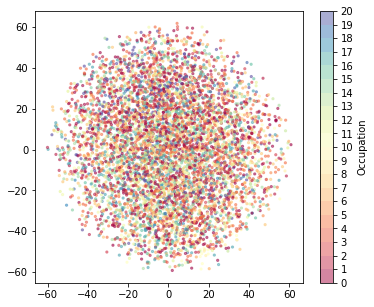

In [168]:
tsne_model = TSNE(n_components=3)
u_tsne = tsne_model.fit_transform(u)
plt.scatter(u_tsne[:,0], u_tsne[:,-1], c=gender, alpha=0.5, cmap='Spectral',s=5)
plt.colorbar(label="Gender").set_ticks([0,1])
plt.savefig("./fig/tsne_gender.png")
plt.show()
plt.scatter(u_tsne[:,0], u_tsne[:,-1], c=age, alpha=0.5, cmap='Spectral',s=5)
plt.colorbar(boundaries=np.arange(61), label="Age").set_ticks(np.arange(0,60,5))
plt.savefig("./fig/tsne_age.png")
plt.show()
plt.scatter(u_tsne[:,0], u_tsne[:,-1], c=occupation, alpha=0.5, cmap='Spectral',s=5)
plt.colorbar(boundaries=np.arange(21), label="Occupation").set_ticks(np.arange(21))
plt.savefig("./fig/tsne_occ.png")
plt.show()

## Movies

可以看到，降维后数据较为明显地被聚为两类，但是尝试了各种labels都不能有效地表示这两类。

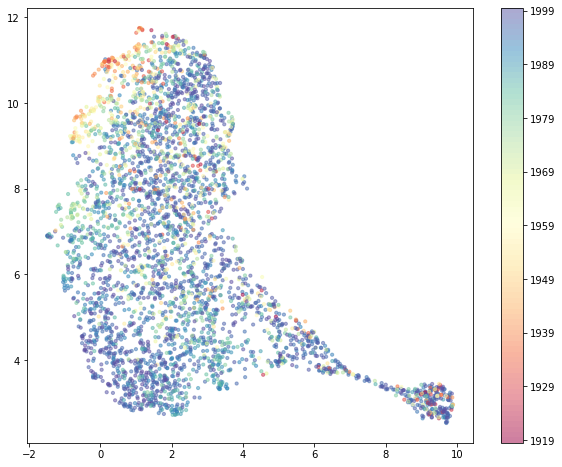

In [70]:
m_tsne = umap_model.fit_transform(m)
plt.scatter(m_tsne[:,0], m_tsne[:,-1], c=year, alpha=0.5, cmap='Spectral',s=10)
plt.colorbar(boundaries=np.arange(1919, 2001)-0.5).set_ticks(np.arange(1919,2000,10))

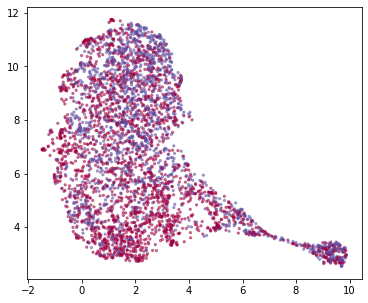

In [177]:
has_drama = movies["Genres"].apply(lambda g: ("Drama" in g))
plt.scatter(m_tsne[:,0], m_tsne[:,-1], c=has_drama, alpha=0.5, cmap='Spectral',s=5)